# Bike Sharing Assignment

### Problem Statement



In [1082]:
#Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [1083]:
#Import libraries numpy and pandas 
import numpy as np
import pandas as pd

In [1084]:
#Reading the CSV file
d=pd.read_csv(r"C:\Users\Aishwarya\Downloads\day.csv")
d.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1085]:
d.shape

(730, 16)

In [1086]:
d.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [1087]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1088]:
d.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1089]:
# Removing unwanted columns
d.drop('instant', axis=1, inplace=True)
d.drop('dteday', axis=1, inplace=True)
d.drop('casual', axis=1, inplace=True)
d.drop('registered', axis=1, inplace=True)

In [1090]:
d.shape

(730, 12)

In [1091]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


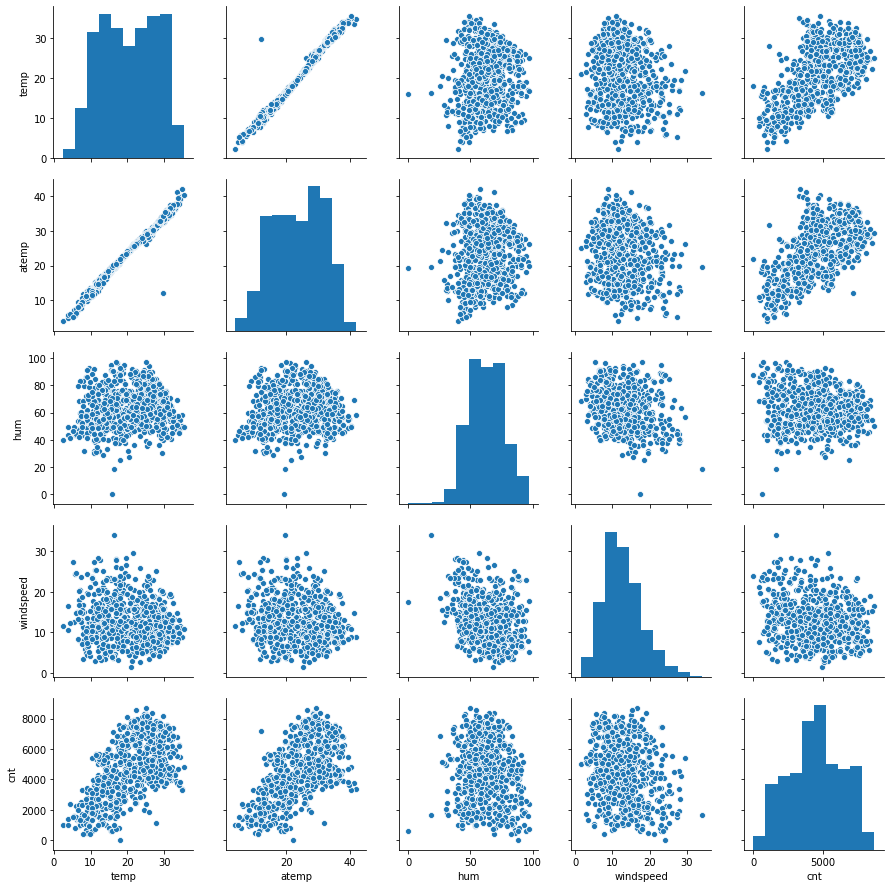

In [1092]:
sns.pairplot(d[["temp","atemp","hum","windspeed","cnt"]])
plt.show()

In [1093]:
d[["temp","atemp","hum","windspeed","cnt"]].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [1094]:
d['season']=d['season'].astype("category")
d['weekday']=d['weekday'].astype("category")
d['weathersit']=d['weathersit'].astype("category")
d['mnth']=d['mnth'].astype("category")
d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


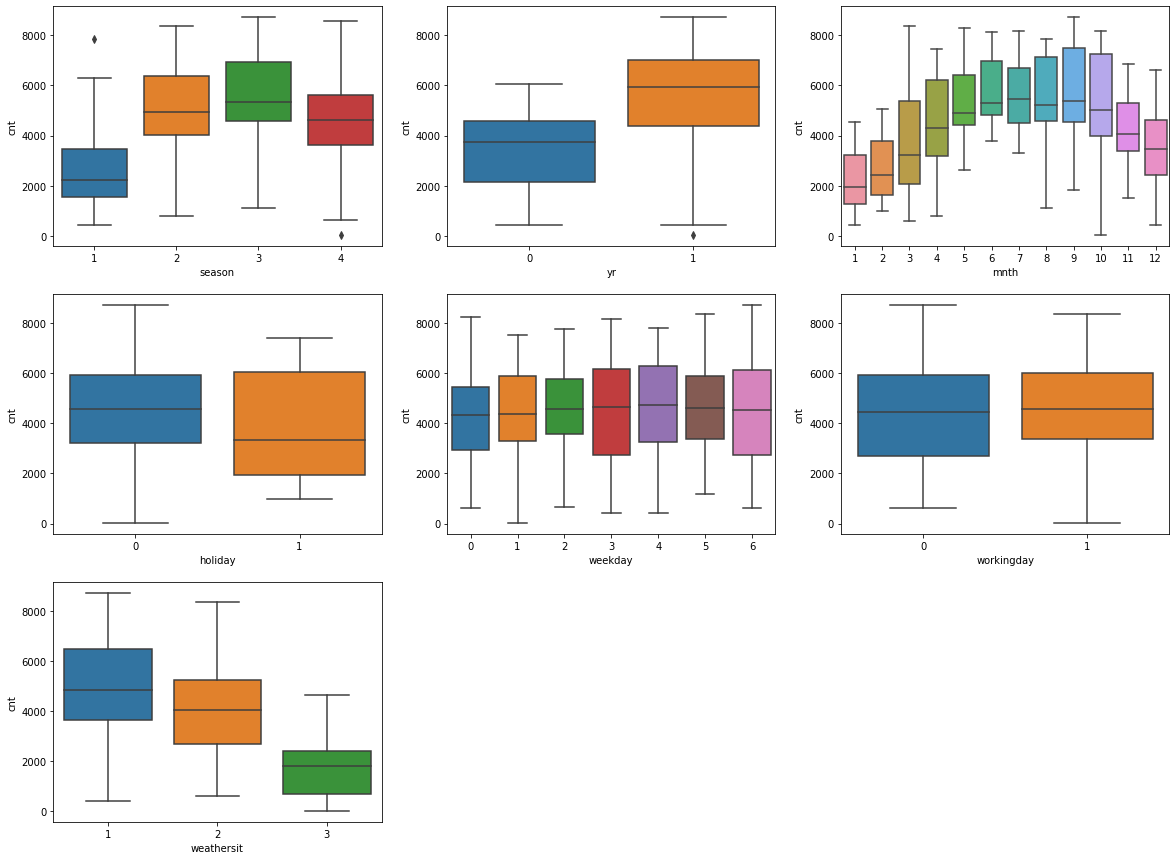

In [1095]:
#Categorical varibales
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x="season",y="cnt",data=d)
plt.subplot(3,3,2)
sns.boxplot(x="yr",y="cnt",data=d)
plt.subplot(3,3,3)
sns.boxplot(x="mnth",y="cnt",data=d)
plt.subplot(3,3,4)
sns.boxplot(x="holiday",y="cnt",data=d)
plt.subplot(3,3,5)
sns.boxplot(x="weekday",y="cnt",data=d)
plt.subplot(3,3,6)
sns.boxplot(x="workingday",y="cnt",data=d)
plt.subplot(3,3,7)
sns.boxplot(x="weathersit",y="cnt",data=d)

In [1096]:
d.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


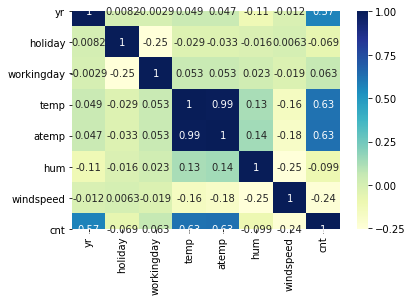

In [1097]:
sns.heatmap(d.corr(), annot=True, cmap="YlGnBu")

# Dummy Variables

### 

In [1098]:
#Importng libraries for data visualization purpose
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1101]:
d['season']=d['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
d['weekday']=d['weekday'].map({1:'Monday',2:'Tuesday',3:'Wednesday', 4:'Thursday', 5:'Friday',6:0, 0:0})
d['weathersit']=d['weathersit'].map({1:'Clear', 2:'Mist & Cloudy', 3: 'Light snow&Rain', 4:'Heavy Snow&Rain'})
d['mnth']=d['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
#d[['yr','holiday','workingday']]=d[['yr','holiday','workingday']].apply(lambda x:x.map({0:'0',1:'1'}))
d.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,NaN,0,NaN,0,0,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,NaN,0,NaN,0,0,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,NaN,0,NaN,0,NaN,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,NaN,0,NaN,0,NaN,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,NaN,0,NaN,0,NaN,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


In [1081]:
seasons=pd.DataFrame()
seasons=pd.get_dummies(d['season'],drop_first=True)
month=pd.get_dummies(d['mnth'],drop_first=True)
weekday=pd.get_dummies(d['weekday'],drop_first=True)
weathersit=pd.get_dummies(d['weathersit'],drop_first=True)
print(seasons.head(),"\n")
print(month.head(),"\n")
print(weekday.head(),"\n")
print(weathersit.head())

KeyError: 'season'

In [1023]:
d=pd.concat([d,seasons,month,weathersit,weekday],axis=1)
d.drop('Friday', axis=1, inplace=True)

In [1024]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
season             730 non-null category
yr                 730 non-null int64
mnth               730 non-null category
holiday            730 non-null int64
weekday            730 non-null object
workingday         730 non-null int64
weathersit         730 non-null category
temp               730 non-null float64
atemp              730 non-null float64
hum                730 non-null float64
windspeed          730 non-null float64
cnt                730 non-null int64
summer             730 non-null uint8
fall               730 non-null uint8
winter             730 non-null uint8
Feb                730 non-null uint8
Mar                730 non-null uint8
Apr                730 non-null uint8
May                730 non-null uint8
Jun                730 non-null uint8
Jul                730 non-null uint8
Aug                730 non-null uint8
Sep                730 non-null uint8
Oct

In [1025]:
d.drop('mnth',axis=1, inplace=True)
d.drop('weekday', axis=1, inplace=True)
d.drop('weathersit', axis=1, inplace=True)
d.drop('season', axis=1, inplace=True)

In [1026]:
d.shape

(730, 28)

In [1027]:
d.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Mist & Cloudy,Light snow&Rain,Monday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting data into training set and test set

In [1028]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
d_train,d_test=train_test_split(d, train_size=0.7, random_state=100)

In [1029]:
from sklearn.preprocessing import MinMaxScaler

In [1030]:
Scaler =MinMaxScaler()

In [1031]:
n_var=['temp',"atemp",'hum','windspeed','cnt']
d_train[n_var]=Scaler.fit_transform(d_train[n_var])

In [1032]:
d_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Mist & Cloudy,Light snow&Rain,Monday,Thursday,Tuesday,Wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,1,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,1,0,0,0,0,0


In [1033]:
d_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Mist & Cloudy,Light snow&Rain,Monday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.080392,0.084314,0.086275,0.084314,0.345098,0.029412,0.150980,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.272166,0.278131,0.281045,0.278131,0.475867,0.169124,0.358381,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


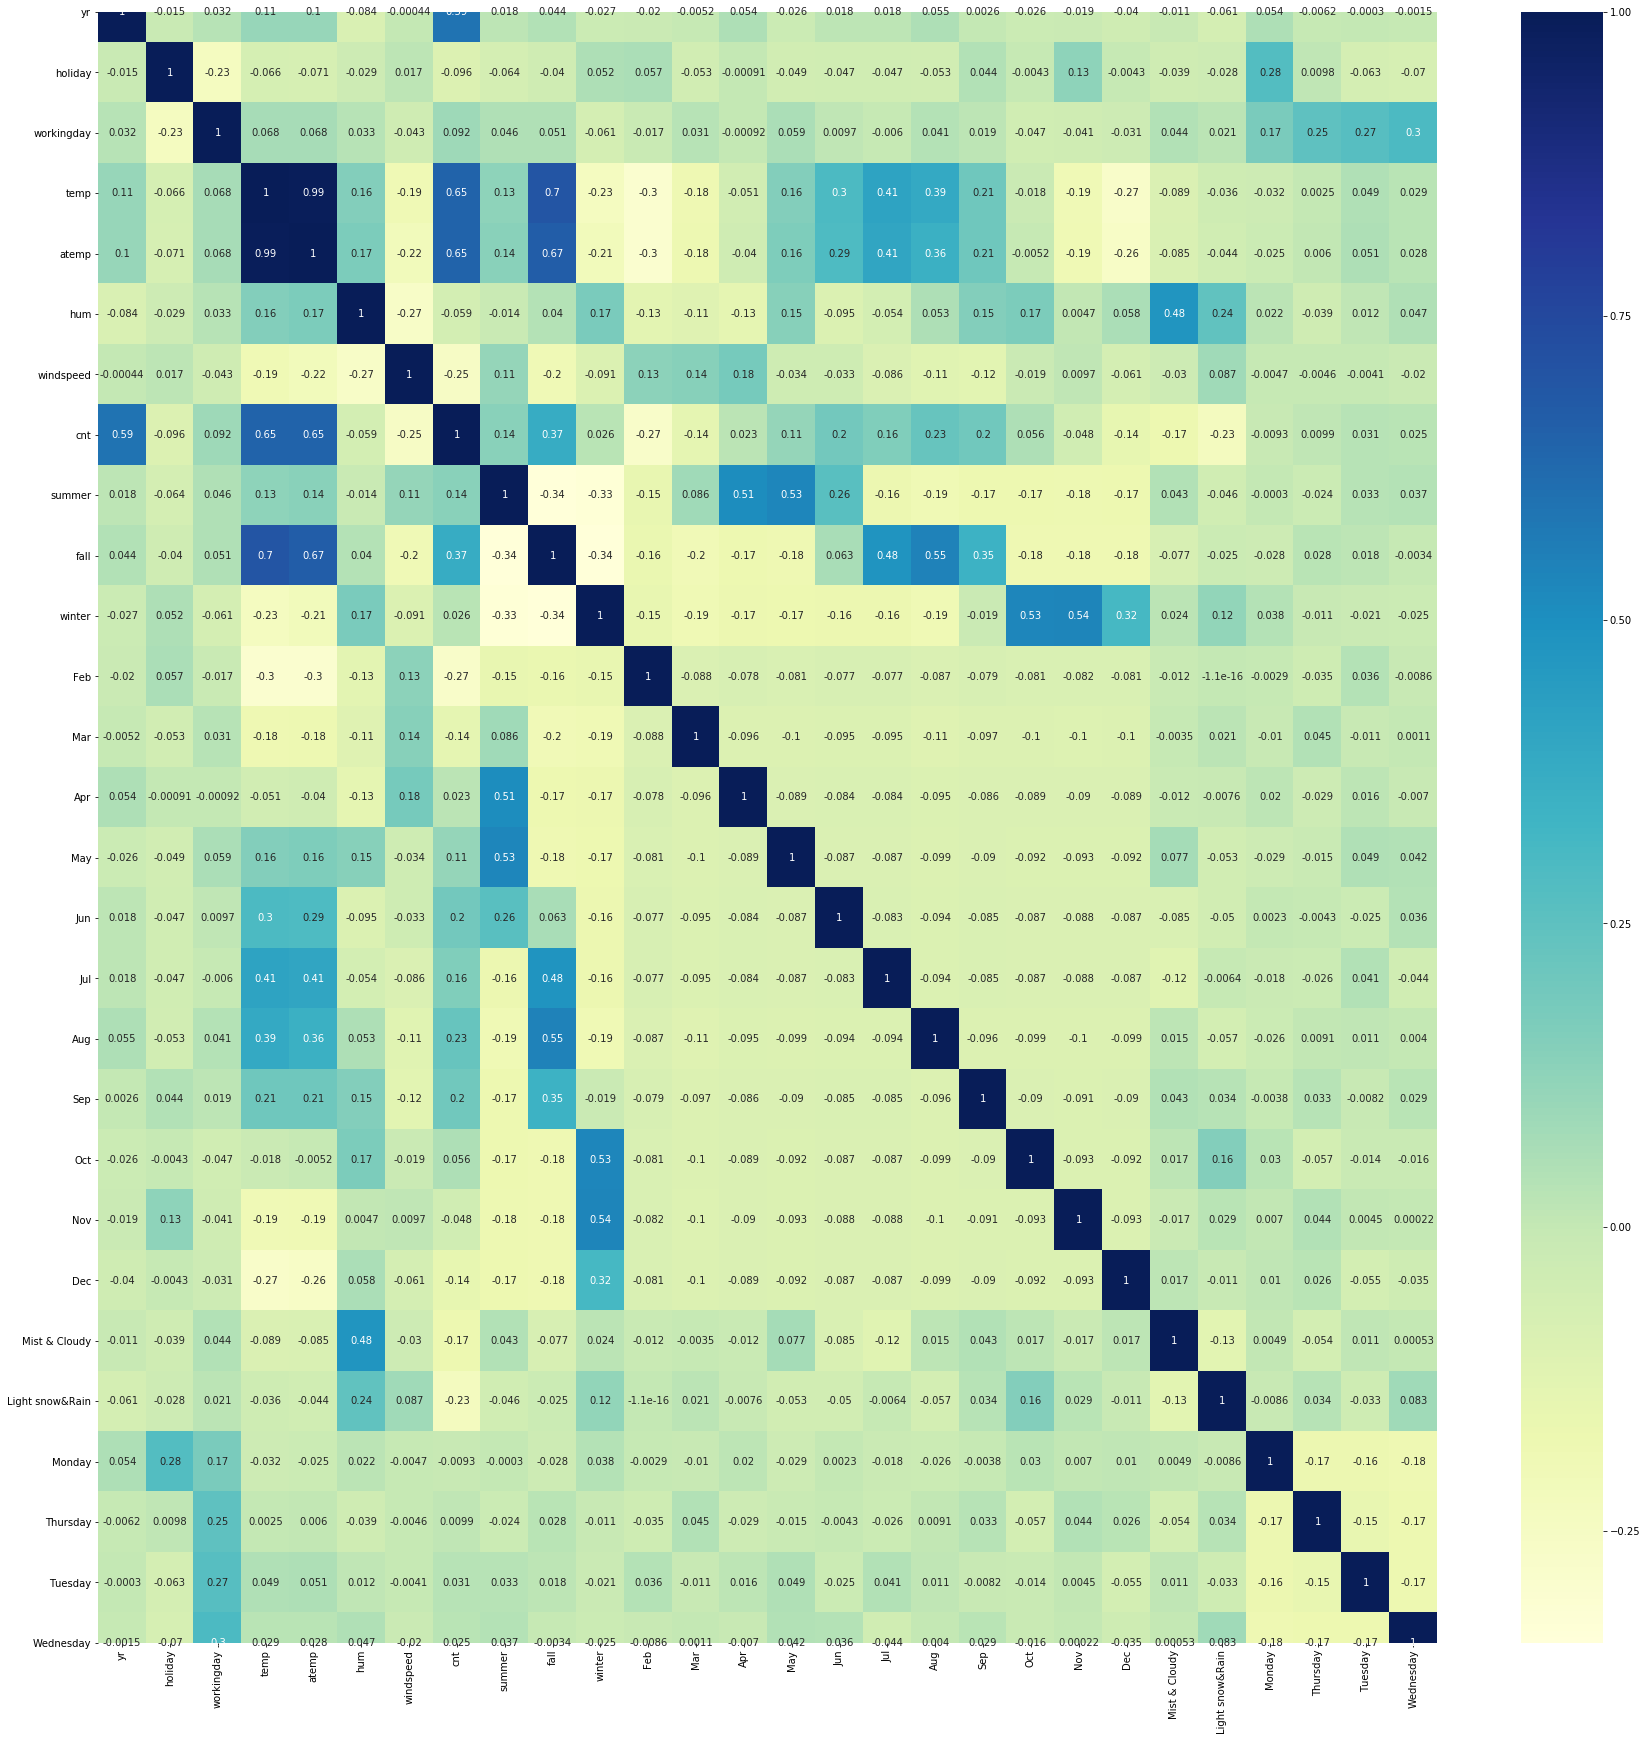

In [1034]:
plt.figure(figsize = (30, 30))
sns.heatmap(d_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1035]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 28 columns):
yr                 510 non-null int64
holiday            510 non-null int64
workingday         510 non-null int64
temp               510 non-null float64
atemp              510 non-null float64
hum                510 non-null float64
windspeed          510 non-null float64
cnt                510 non-null float64
summer             510 non-null uint8
fall               510 non-null uint8
winter             510 non-null uint8
Feb                510 non-null uint8
Mar                510 non-null uint8
Apr                510 non-null uint8
May                510 non-null uint8
Jun                510 non-null uint8
Jul                510 non-null uint8
Aug                510 non-null uint8
Sep                510 non-null uint8
Oct                510 non-null uint8
Nov                510 non-null uint8
Dec                510 non-null uint8
Mist & Cloudy      510 non-null uint8
Light sno

In [1036]:

d_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,Sep,Oct,Nov,Dec,Mist & Cloudy,Light snow&Rain,Monday,Thursday,Tuesday,Wednesday
yr,1.000000,-0.014980,0.031808,0.108054,0.104971,-0.084061,-0.000439,0.591433,0.018294,0.044102,...,0.002574,-0.025933,-0.018790,-0.040049,-0.011388,-6.076399e-02,0.053634,-0.006153,-0.000296,-0.001452
holiday,-0.014980,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.063798,-0.040017,...,0.043692,-0.004302,0.127543,-0.004302,-0.038895,-2.815377e-02,0.279279,0.009759,-0.062897,-0.070276
workingday,0.031808,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,0.092019,0.046302,0.050976,...,0.019495,-0.046584,-0.041271,-0.031500,0.043563,2.115873e-02,0.174565,0.246594,0.268948,0.300501
temp,0.108054,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,0.645048,0.126057,0.697012,...,0.207212,-0.018286,-0.194994,-0.273091,-0.089452,-3.622709e-02,-0.032455,0.002518,0.048662,0.029020
atemp,0.104971,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,0.647944,0.136550,0.669431,...,0.205900,-0.005162,-0.185918,-0.262072,-0.085086,-4.439780e-02,-0.025473,0.006022,0.051493,0.027554
hum,-0.084061,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.058793,-0.014192,0.039925,...,0.152439,0.167153,0.004676,0.057615,0.479436,2.449653e-01,0.022296,-0.038530,0.012087,0.046866
windspeed,-0.000439,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,0.110441,-0.195088,...,-0.121930,-0.018546,0.009742,-0.061179,-0.029892,8.677832e-02,-0.004658,-0.004620,-0.004101,-0.019862
cnt,0.591433,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.140259,0.372210,...,0.201639,0.055558,-0.048002,-0.143546,-0.169715,-2.266784e-01,-0.009333,0.009928,0.030528,0.025468
summer,0.018294,-0.063798,0.046302,0.126057,0.136550,-0.014192,0.110441,0.140259,1.000000,-0.341962,...,-0.169366,-0.173818,-0.176016,-0.173818,0.043202,-4.590079e-02,-0.000299,-0.024073,0.032932,0.037167
fall,0.044102,-0.040017,0.050976,0.697012,0.669431,0.039925,-0.195088,0.372210,-0.341962,1.000000,...,0.347811,-0.181148,-0.183439,-0.181148,-0.077248,-2.481685e-02,-0.027766,0.027959,0.018412,-0.003441


In [1037]:
d.drop('atemp',axis=1,inplace=True)

In [1038]:
## Dividing into x and y sets

In [1039]:
y_train=d_train.pop('cnt')
x_train=d_train

In [1040]:
#importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1041]:
lm=LinearRegression()
lm.fit(x_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(x_train,y_train)

In [1042]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 5),
 ('Mar', True, 1),
 ('Apr', False, 3),
 ('May', True, 1),
 ('Jun', False, 2),
 ('Jul', False, 6),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 7),
 ('Dec', False, 8),
 ('Mist & Cloudy', True, 1),
 ('Light snow&Rain', True, 1),
 ('Monday', False, 10),
 ('Thursday', False, 12),
 ('Tuesday', False, 11),
 ('Wednesday', False, 13)]

In [1043]:
col=x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'Mar', 'May', 'Aug', 'Sep', 'Oct', 'Mist & Cloudy', 'Light snow&Rain'],
      dtype='object')

In [1044]:
#Building a model using a statsmodel


In [1045]:
x_train_r=x_train[col]

In [1046]:
import statsmodels.api as sm 
x_train_rfe=sm.add_constant(x_train_r)

In [1047]:
lm = sm.OLS(y_train,x_train_rfe.astype(float)).fit()

In [1048]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.00e-188
Time:                        14:08:36   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2374      0.027      8.665      0.000       0.184       0.291
yr                  0.2304      0.008     28.453      0.000       0.215       0.246
holiday            -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp                0.4869      0.034     14.119      0.000       0.419       0.555
hum                -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed          -0.1839      0.026     -7.162      0.000      -0.234      -0.133
summer              0.1166      0.015      7.527      0.000       0.086       0.147
fall                0.0425      0.023      1.847      0.065      -0.003       0.088
winter              0.1530      0.014     10.801      0.000       0.125       0.181
Mar                 0.0323      0.015      2.196      0.029       0.003       0.061
May                 0.0282      0.018      1.581      0.115      -0.007       0.063
Aug                 0.0509      0.017      2.913      0.004       0.017       0.085
Sep                 0.1207      0.017      6.984      0.000       0.087       0.155
Oct                 0.0407      0.018      2.314      0.021       0.006       0.075
Mist & Cloudy      -0.0542      0.010     -5.187      0.000      -0.075      -0.034
Light snow&Rain    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1049]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_r
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values.astype(float), i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.63
3,hum,15.53
6,fall,8.80
4,windspeed,3.81
5,summer,3.75
7,winter,3.11
13,Mist & Cloudy,2.15
0,yr,2.05
10,Aug,1.85
9,May,1.68


In [1050]:
x_train_new = x_train_r.drop(["May"], axis = 1)

In [1051]:
x_train_rfe=sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.46e-189
Time:                        14:09:14   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2322      0.027      8.525      0.000       0.179       0.286
yr                  0.2298      0.008     28.366      0.000       0.214       0.246
holiday            -0.0900      0.026     -3.528      0.000      -0.140      -0.040
temp                0.4965      0.034     14.604      0.000       0.430       0.563
hum                -0.1719      0.038     -4.562      0.000      -0.246      -0.098
windspeed          -0.1858      0.026     -7.234      0.000      -0.236      -0.135
summer              0.1225      0.015      8.137      0.000       0.093       0.152
fall                0.0361      0.023      1.593      0.112      -0.008       0.081
winter              0.1502      0.014     10.671      0.000       0.123       0.178
Mar                 0.0279      0.014      1.931      0.054      -0.000       0.056
Aug                 0.0505      0.018      2.883      0.004       0.016       0.085
Sep                 0.1202      0.017      6.946      0.000       0.086       0.154
Oct                 0.0393      0.018      2.231      0.026       0.005       0.074
Mist & Cloudy      -0.0544      0.010     -5.199      0.000      -0.075      -0.034
Light snow&Rain    -0.2449      0.026     -9.259      0.000      -0.297      -0.193
==============================================================================
Omnibus:                       70.936   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.767
Skew:                          -0.736   Prob(JB):                     1.66e-36
Kurtosis:                       5.363   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1052]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values.astype(float), i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.02
3,hum,15.48
6,fall,8.53
4,windspeed,3.73
5,summer,3.53
7,winter,3.05
12,Mist & Cloudy,2.15
0,yr,2.03
9,Aug,1.85
11,Oct,1.63


In [1053]:
x_train_new = x_train_new.drop(["fall"], axis = 1)

In [1054]:
x_train_rfe=sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.94e-190
Time:                        14:09:39   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2326      0.027      8.525      0.000       0.179       0.286
yr                  0.2287      0.008     28.289      0.000       0.213       0.245
holiday            -0.0917      0.026     -3.591      0.000      -0.142      -0.042
temp                0.5371      0.023     23.855      0.000       0.493       0.581
hum                -0.1806      0.037     -4.835      0.000      -0.254      -0.107
windspeed          -0.1893      0.026     -7.388      0.000      -0.240      -0.139
summer              0.1059      0.011      9.743      0.000       0.085       0.127
winter              0.1393      0.012     11.304      0.000       0.115       0.163
Mar                 0.0233      0.014      1.642      0.101      -0.005       0.051
Aug                 0.0605      0.016      3.699      0.000       0.028       0.093
Sep                 0.1292      0.016      7.897      0.000       0.097       0.161
Oct                 0.0355      0.017      2.032      0.043       0.001       0.070
Mist & Cloudy      -0.0532      0.010     -5.093      0.000      -0.074      -0.033
Light snow&Rain    -0.2401      0.026     -9.123      0.000      -0.292      -0.188
==============================================================================
Omnibus:                       63.998   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.779
Skew:                          -0.689   Prob(JB):                     4.44e-31
Kurtosis:                       5.163   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1055]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values.astype(float), i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.73
2,temp,10.01
4,windspeed,3.70
6,winter,2.32
11,Mist & Cloudy,2.14
0,yr,2.02
5,summer,1.84
8,Aug,1.61
10,Oct,1.60
9,Sep,1.34


In [1056]:
x_train_new = x_train_new.drop(["Mar"], axis = 1)

In [1057]:
x_train_rfe=sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.49e-190
Time:                        14:10:44   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2390      0.027      8.838      0.000       0.186       0.292
yr                  0.2289      0.008     28.264      0.000       0.213       0.245
holiday            -0.0941      0.026     -3.685      0.000      -0.144      -0.044
temp                0.5316      0.022     23.836      0.000       0.488       0.575
hum                -0.1818      0.037     -4.861      0.000      -0.255      -0.108
windspeed          -0.1868      0.026     -7.291      0.000      -0.237      -0.136
summer              0.1058      0.011      9.719      0.000       0.084       0.127
winter              0.1353      0.012     11.180      0.000       0.112       0.159
Aug                 0.0585      0.016      3.583      0.000       0.026       0.091
Sep                 0.1277      0.016      7.803      0.000       0.096       0.160
Oct                 0.0358      0.018      2.046      0.041       0.001       0.070
Mist & Cloudy      -0.0531      0.010     -5.073      0.000      -0.074      -0.033
Light snow&Rain    -0.2385      0.026     -9.052      0.000      -0.290      -0.187
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1058]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values.astype(float), i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,winter,2.25
10,Mist & Cloudy,2.13
0,yr,2.02
5,summer,1.84
7,Aug,1.60
9,Oct,1.60
8,Sep,1.34


In [1059]:
x_train_new = x_train_new.drop(["hum"], axis = 1)

In [1060]:
x_train_rfe=sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.45e-187
Time:                        14:11:09   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1346      0.017      8.014      0.000       0.102       0.168
yr                  0.2329      0.008     28.281      0.000       0.217       0.249
holiday            -0.0956      0.026     -3.660      0.000      -0.147      -0.044
temp                0.5099      0.022     22.823      0.000       0.466       0.554
windspeed          -0.1517      0.025     -6.035      0.000      -0.201      -0.102
summer              0.1026      0.011      9.237      0.000       0.081       0.124
winter              0.1266      0.012     10.345      0.000       0.103       0.151
Aug                 0.0569      0.017      3.406      0.001       0.024       0.090
Sep                 0.1208      0.017      7.245      0.000       0.088       0.154
Oct                 0.0311      0.018      1.741      0.082      -0.004       0.066
Mist & Cloudy      -0.0820      0.009     -9.299      0.000      -0.099      -0.065
Light snow&Rain    -0.2869      0.025    -11.510      0.000      -0.336      -0.238
==============================================================================
Omnibus:                       61.862   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.356
Skew:                          -0.653   Prob(JB):                     2.02e-31
Kurtosis:                       5.224   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1061]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values.astype(float), i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,winter,1.93
4,summer,1.83
6,Aug,1.59
8,Oct,1.59
9,Mist & Cloudy,1.49
7,Sep,1.34
10,Light snow&Rain,1.10


In [1062]:
x_train_new = x_train_new.drop(["Oct"], axis = 1)

In [1063]:
x_train_rfe=sm.add_constant(x_train_new)
lm = sm.OLS(y_train,x_train_rfe.astype(float)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.62e-187
Time:                        14:11:40   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1307      0.017      7.837      0.000       0.098       0.163
yr                  0.2326      0.008     28.191      0.000       0.216       0.249
holiday            -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp                0.5173      0.022     23.546      0.000       0.474       0.561
windspeed          -0.1497      0.025     -5.950      0.000      -0.199      -0.100
summer              0.1012      0.011      9.116      0.000       0.079       0.123
winter              0.1371      0.011     12.843      0.000       0.116       0.158
Aug                 0.0541      0.017      3.249      0.001       0.021       0.087
Sep                 0.1163      0.017      7.046      0.000       0.084       0.149
Mist & Cloudy      -0.0811      0.009     -9.200      0.000      -0.098      -0.064
Light snow&Rain    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1064]:
vif = pd.DataFrame()
x = x_train_new
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values.astype(float), i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,summer,1.82
6,Aug,1.58
8,Mist & Cloudy,1.49
5,winter,1.48
7,Sep,1.31
9,Light snow&Rain,1.08
1,holiday,1.04


In [1065]:
# Checking assumptions

In [1066]:
y_train_cnt = lm.predict(x_train_rfe.astype(float))

Text(0.5, 0, 'Errors')

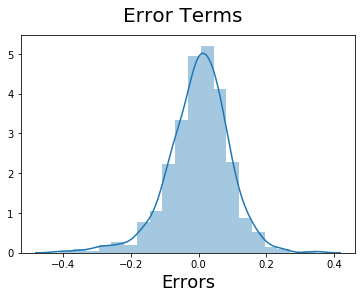

In [1067]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [1068]:
#plt.scatter(x='x_train', y=y_train - y_train_cnt)
#plt.show()

In [1069]:
#### Test data

In [1070]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

d_test[num_vars] = Scaler.transform(d_test[num_vars])

In [1071]:
#Dividing into x_test and y_test

y_test = d_test.pop('cnt')
x_test = d_test

# Creating X_test_new dataframe by dropping variables from X_test
x_test_ne = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_ne)

In [1072]:
x_test_new.head()

,const,yr,holiday,temp,windspeed,summer,winter,Aug,Sep,Mist & Cloudy,Light snow&Rain
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,1,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0,0


In [1073]:
y_test_pred = lm.predict(x_test_new.astype(float))

Text(0, 0.5, 'y_test_pred')

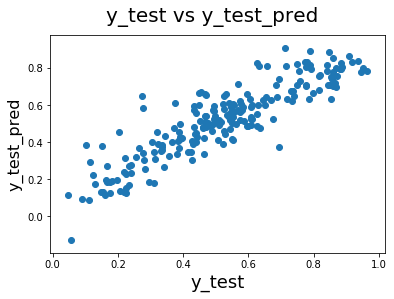

In [1074]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16) 

In [1077]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7935224695104377

In [1078]:
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

0.009872574354838978

In [1079]:
adj_r2= 1-((1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-10-1))
adj_r2

0.7836431618315113